In [1]:
# шаг 2
import pandas as pd
user_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-bykov/lesson_3/user_data.csv')
logs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-bykov/lesson_3/logs.csv')

In [13]:
user_data.shape

(2954, 3)

In [14]:
logs.shape

(4500, 4)

In [15]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [16]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [17]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [19]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [23]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [24]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [26]:
logs.platform.nunique()

3

In [63]:
# шаг 3
good_client = logs[logs.success == True].client.value_counts()
good_client[good_client > 40].index.sort_values()

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64')

In [64]:
# шаг 4
logs[logs.success == True].platform.value_counts()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

In [2]:
# шаг 5
df = user_data.merge(logs, on='client')
df[df.premium == True].platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

In [44]:
df.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


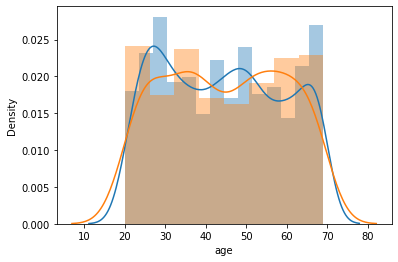

In [16]:
# шаг 6
sns.distplot(df[df.premium == False].age)
sns.distplot(df[df.premium == True].age)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


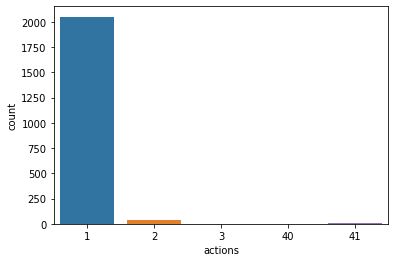

In [42]:
# шаг 7
df_s = df[df.success == True].groupby('client') \
    .agg({'success': 'count'})\
    .rename(columns={'success': 'actions'})
sns.countplot(df_s.actions)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


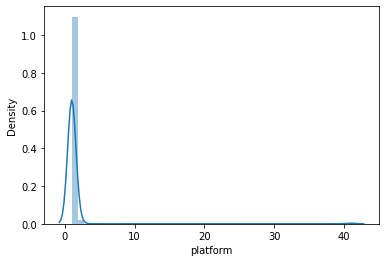

In [38]:
# шаг 7 (вариант)
sns.distplot(df_ss.platform)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


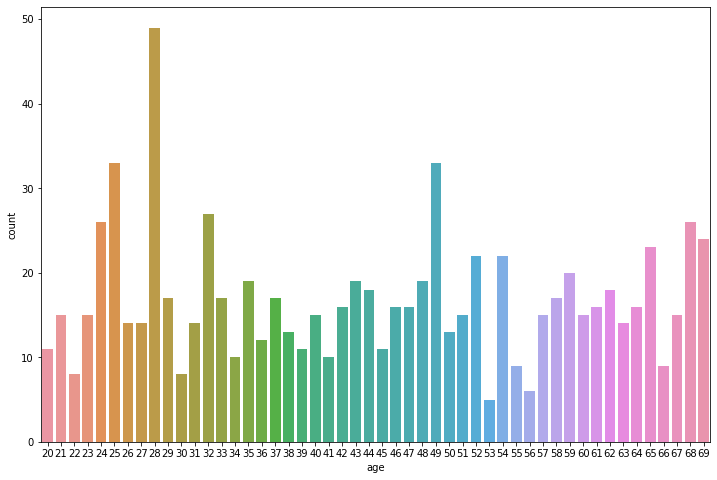

In [57]:
# шаг 8
plt.figure(figsize=(12, 8)) # для увеличения размеров графика
df_c = df.query("success == True and platform == 'computer'")
sns.countplot(df_c.age)